In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import DNN as dnn
import time
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')

In [14]:
train,test=dnn.load_data(forth=21,test=True)
train.to_csv('train.csv')
test.to_csv('test.csv')

In [5]:
trainX,train_interest_y,train_action_y,testX,test_interest_y,test_action_y=dnn.data_pipeline(train,test)

In [6]:
prep_model=dnn.train_prep_model(trainX)
trainX=prep_model(trainX,training=False)
testX=prep_model(testX,training=False)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='time_stamp'), name='time_stamp', description="created by layer 'time_stamp'")


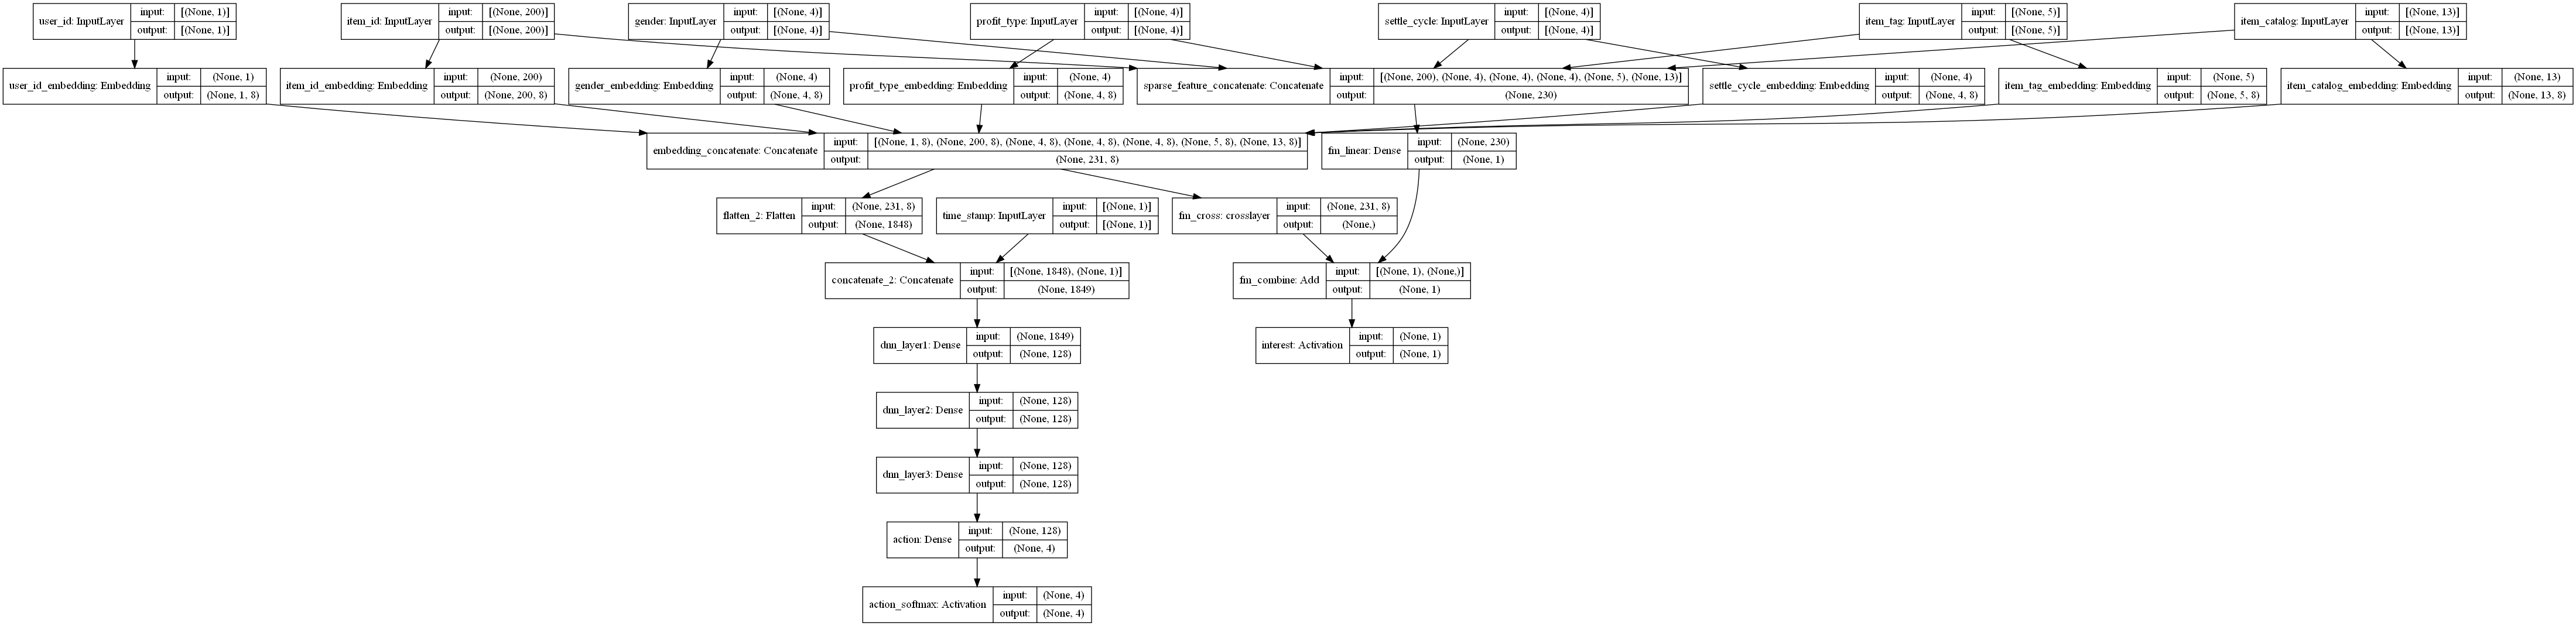

In [7]:
model=dnn.DeepFM()
tf.keras.utils.plot_model(model,show_shapes=True)

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
loss={'interest':tf.keras.losses.BinaryCrossentropy(),
    'action_softmax':tf.keras.losses.CategoricalCrossentropy()},
    metrics={'interest':dnn.roc_auc,'action_softmax':tf.keras.metrics.Accuracy()},
    loss_weights=[1,2])

,user_id,age,gender,time_stamp,item_id,item_catalog,item_tag,profit_type,settle_cycle,action,interest
0,a350e2d47a6f4f6cbb20981c6c9b5177,0,UNK,1614009905,024f655f486c416aa189b62a44b63fd0,1,纯线上,PIECE_MONEY,MONTH,JUST_LOOKING,1
1,87d2f6f3791e46a0b77fdea1cb904e67,32,男,1614009990,d13ad19340c0427fb44d3426254eeac2,12,信⽤贷款 ⽆抵押 ⽆担保 凭烟草证就能借 、,PIECE_PERCENT,MONTH,JUST_LOOKING,1
2,888c688c3fff415fbcf1a7ccfd0f82ef,0,UNK,1614010121,9a68c6d85a1d47b285ed781ff2171e7b,9,额度大,UNK,MONTH,JUST_LOOKING,1
3,888c688c3fff415fbcf1a7ccfd0f82ef,0,UNK,1614010152,243fa91cc52747a7a59867b6087c08c8,6,高成数 快速放款,PIECE_PERCENT,MONTH,JUST_LOOKING,1
4,888c688c3fff415fbcf1a7ccfd0f82ef,0,UNK,1614010161,1eb4ae2d201d470ebd43ef85d9f1e48d,6,抵押贷 高成数,PIECE_PERCENT,MONTH,JUST_LOOKING,1
...,...,...,...,...,...,...,...,...,...,...,...
9470,4bd02d9d74424f69a14df9588528dda4,0,UNK,1614182317,8537092f616346f2a9f3ef23aa120cf8,1,纯线上,PIECE_PERCENT,MONTH,JUST_LOOKING,1
9471,4bd02d9d74424f69a14df9588528dda4,0,UNK,1614182335,024f655f486c416aa189b62a44b63fd0,1,纯线上,PIECE_MONEY,MONTH,JUST_LOOKING,1
9472,4bd02d9d74424f69a14df9588528dda4,0,UNK,1614182367,0ecbd81b65974328845f2687fa41e908,1,利息低 纯线上 通过率高,PIECE_PERCENT,MONTH,JUST_LOOKING,1
9473,4bd02d9d74424f69a14df9588528dda4,0,UNK,1614182376,c789941d88c84c6193be364ce18995f5,1,等额本金,PIECE_PERCENT,MONTH,JUST_LOOKING,1
